In [50]:
%matplotlib widget 

In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx

In [3]:
M8190A = VisaR(AWG_Settings3,60000)

In [3]:
Initialization(M8190A,AWG_Settings3)

Instruments Sampling Frecuency set to 5.00000000000000E+08Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [4]:
M8190A.write('SEQ:DEL:ALL')

12

In [6]:
Pump = {
    'Name':'Pump',
    'Amplitude':40,
    'Start time':2,
    'End time':2e-10,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [7]:
ProbeAutoA = {
    'Name':'ProbeAutoA',
    'Amplitude':25,
    'Start time':0,
    'End time':4,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':1,
    'Sweep Duration':0
}

In [8]:
ProbeAutoB = {
    'Name':'ProbeAutoB',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

Sr = 6Ghz for 5 ms

In [9]:
sam = int(6e9*5e-3)

sam /480

M8190A.write('FREQ:RAST 6000000000')

21

In [11]:
sam

30000000.0

In [10]:
AutoCorSchemeA = [Pump, ProbeAutoA]
AutoCorSchemeB = [ProbeAutoB, ProbeAutoB]
#step = 0

In [14]:
test_run = Triggered_Sequence_Setup(AutoCorSchemeA,AutoCorSchemeB,10,5,5,sam,M8190A,AWG_Settings3,1)

Current Segment Catalogue is 1,30000000,2,7500000  [(segment id, Segment size)]
Current Segment Catalogue is 1,30000000,2,30000000  [(segment id, Segment size)]
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND


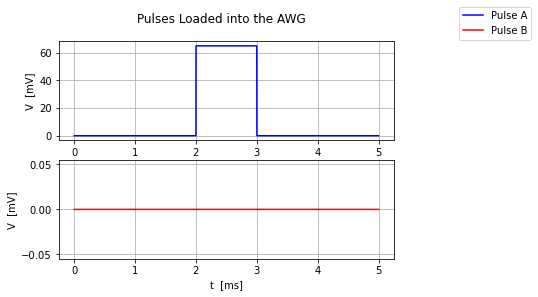

In [15]:
fig,ax= plt.subplots(2)

ax[0].grid(True)
ax[1].grid(True)
fig.suptitle('Pulses Loaded into the AWG')


ax[0].plot(test_run[2],test_run[0]['Y1']*AWG_Settings4['Voltage Amplitude'],label= 'Pulse A',color='blue')
ax[1].plot(test_run[2],test_run[1]['Y1']*AWG_Settings4['Voltage Amplitude'],label= 'Pulse B',color='red')
ax[0].set_ylabel('V  [mV]')
ax[0].set_xlabel('t  [ms]')
ax[1].set_ylabel('V  [mV]')
ax[1].set_xlabel('t  [ms]')

#ax.set_title('Pulses Loaded into the AWG')

fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig('Pulse_scheme_15ms_7500000',optimize=True,bbox_inches='tight')

In [19]:
dataMs, timeMs = DAQ_Measuring_Markersms(DAQ_Settings1,200000,32,M8190A)

fig,ax= plt.subplots()
ax.grid(True)

#plt.plot(timeMs,dataMs[1]*1000,label= 'Marker Channel {chan}'.format(chan=DAQ_Settings1['Analog Channel Input Marker']),color='purple')
plt.plot(timeMs,dataMs[0]*1000,label= '{b} samples'.format(b=len(dataMs[0])),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title('AutoCorrelation Scheme Measured with DAC, Overlaping Step ') #Voltage Offset = 3mV, Marker Ampl = 50mV 
ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
#fig.savefig('AutoCorrelation Scheme Meaasured with DAC, Overlaping Step.pdf',bbox_inches='tight')

Triggering Pulse Stoped


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [57]:
M8190A.write('SEQ:DEL:ALL')

12

In [13]:
sweeping_run = Sequence_File_List(AutoCorSchemeA,AutoCorSchemeB,10,5,sam,0,10,AWG_Settings3)

In [16]:
import pickle

#exporting pickle 

pickle.dump(sweeping_run[0], open("sweepingA.p", "wb"))  # save it into a file named sweepingA.p
pickle.dump(sweeping_run[1], open("sweepingB.p", "wb"))  # save it into a file named sweepingB.p


<ipython-input-16-fce5a3f7a043>:5: ResourceWarning: unclosed file <_io.BufferedWriter name='sweepingA.p'>
  pickle.dump(sweeping_run[0], open("sweepingA.p", "wb"))  # save it into a file named sweepingA.p
<ipython-input-16-fce5a3f7a043>:6: ResourceWarning: unclosed file <_io.BufferedWriter name='sweepingB.p'>
  pickle.dump(sweeping_run[1], open("sweepingB.p", "wb"))  # save it into a file named sweepingB.p


In [21]:
sweeping_run[0]

{'Pulse File Location, at step 0': 'D:\\Alejandro\\Pulses\\Dict\\S3\\SegmentA_30000000_0.csv',
 'Pulse File Location, at step 1': 'D:\\Alejandro\\Pulses\\Dict\\S3\\SegmentA_30000000_1.csv',
 'Pulse File Location, at step 2': 'D:\\Alejandro\\Pulses\\Dict\\S3\\SegmentA_30000000_2.csv',
 'Pulse File Location, at step 3': 'D:\\Alejandro\\Pulses\\Dict\\S3\\SegmentA_30000000_3.csv',
 'Pulse File Location, at step 4': 'D:\\Alejandro\\Pulses\\Dict\\S3\\SegmentA_30000000_4.csv',
 'Pulse File Location, at step 5': 'D:\\Alejandro\\Pulses\\Dict\\S3\\SegmentA_30000000_5.csv',
 'Pulse File Location, at step 6': 'D:\\Alejandro\\Pulses\\Dict\\S3\\SegmentA_30000000_6.csv',
 'Pulse File Location, at step 7': 'D:\\Alejandro\\Pulses\\Dict\\S3\\SegmentA_30000000_7.csv',
 'Pulse File Location, at step 8': 'D:\\Alejandro\\Pulses\\Dict\\S3\\SegmentA_30000000_8.csv',
 'Pulse File Location, at step 9': 'D:\\Alejandro\\Pulses\\Dict\\S3\\SegmentA_30000000_9.csv',
 'Pulse File Location, at step 10': 'D:\\Alejandro

In [18]:
#importing pickle

sweeping_runa = pickle.load(open("sweepingA.p", "rb"))
sweeping_runb = pickle.load(open("sweepingB.p", "rb"))

<ipython-input-18-91d7a502f188>:3: ResourceWarning: unclosed file <_io.BufferedReader name='sweepingA.p'>
  sweeeping_runa = pickle.load(open("sweepingA.p", "rb"))
<ipython-input-18-91d7a502f188>:4: ResourceWarning: unclosed file <_io.BufferedReader name='sweepingB.p'>
  sweeeping_runb = pickle.load(open("sweepingB.p", "rb"))


In [20]:
sweeping_runa == sweeping_run[0]

True

In [ ]:
#pickle sweeping run dictionaries 10 steps

with open('sweepingA.pickle', 'wb') as handle:
    pickle.dump(sweeping_run[0], handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('sweepingA.pickle', 'rb') as handle:
    b = pickle.load(handle)

print sweeping_run[0] == b

In [ ]:



with open('sweepingB.pickle', 'wb') as handle:
    pickle.dump(sweeping_run[1], handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('sweepingB.pickle', 'rb') as handle:
    c = pickle.load(handle)

print sweeping_run[1] == c

In [27]:
haberms = Sequence_Loader_File_DAQms_np(M8190A,DAQ_Settings1,400000,32,sweeping_run[0],sweeping_run[1])

Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 0
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 1
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 2
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 3
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 4


In [23]:
#for stepp in range(0,len(haber)):

fig,ax= plt.subplots()

step = 4

ax.grid(True)
plt.plot(haberms[step][1],1000*haberms[step][0],label= 'Step {st}'.format(st = step ),color = 'blue')

ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title(' Sweeping Measured by DAQ,  step number {stp},  {b} samples'.format(stp =step ,b = len(haberms[0][1]) ))
ax.legend(loc=0)

plt.show()
#fig.savefig('Pulse sweep t=32ms DAQ measured not so clean, {co}step.png'.format(co = step),bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [24]:
#for stepp in range(0,len(haber)):

fig,ax= plt.subplots()

#step = 4

ax.grid(True)
plt.plot(haberms[1][1],1000*haberms[1][0],label= 'Step {st}'.format(st = 1 ),color = 'red')
plt.plot(haberms[2][1],1000*haberms[2][0],label= 'Step {st}'.format(st = 2 ),color = 'orange')
plt.plot(haberms[3][1],1000*haberms[3][0],label= 'Step {st}'.format(st = 3 ),color = 'blue')
plt.plot(haberms[4][1],1000*haberms[4][0],label= 'Step {st}'.format(st = 4 ),color = 'purple')



ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title(' Sweeping Measured by DAQ,  {b} samples'.format(b = len(haberms[0][1]) ))
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse sweep t=32ms DAQ measured not so clean, 4 sweeping steps.png',bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [28]:
#for stepp in range(0,len(haber)):

fig,ax= plt.subplots()

step = 4

ax.grid(True)
plt.plot(haberms[step][1],1000*haberms[step][0],label= 'Step {st}'.format(st = step ),color = 'blue')

ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title(' Sweeping Measured by DAQ,  step number {stp},  {b} samples'.format(stp =step ,b = len(haberms[0][1]) ))
ax.legend(loc=0)

plt.show()
#fig.savefig('Pulse sweep t=32ms DAQ measured not so clean, {co}step.png'.format(co = step),bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [29]:
#for stepp in range(0,len(haber)):

fig,ax= plt.subplots()

#step = 4

ax.grid(True)
plt.plot(haberms[1][1],1000*haberms[1][0],label= 'Step {st}'.format(st = 1 ),color = 'red')
plt.plot(haberms[2][1],1000*haberms[2][0],label= 'Step {st}'.format(st = 2 ),color = 'orange')
plt.plot(haberms[3][1],1000*haberms[3][0],label= 'Step {st}'.format(st = 3 ),color = 'blue')
plt.plot(haberms[4][1],1000*haberms[4][0],label= 'Step {st}'.format(st = 4 ),color = 'purple')



ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title(' Sweeping Measured by DAQ,  {b} samples'.format(b = len(haberms[0][1]) ))
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse sweep t=32ms DAQ measured not so clean, 4 sweeping steps.png',bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [64]:
M8190A.write('SEQ:DEL:ALL')

12

In [65]:
haber = Sequence_Loader_File_DAQ_np(M8190A,DAQ_Settings1,1000,10,sweeping_run[0],sweeping_run[1])

Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 0
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 1
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 2
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 3
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 4
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse 

In [39]:
#for stepp in range(0,len(haber)):

fig,ax= plt.subplots()

step = 3

ax.grid(True)
plt.plot(haber[step][1],1000*haber[step][0],label= 'Step {st}'.format(st = step ),color = 'blue')

ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [s]')
ax.set_title(' Sweeping Measured by DAQ,  step number {stp},  {b} samples'.format(stp =step ,b = len(haber[0][1]) ))
ax.legend(loc=0)

plt.show()
#fig.savefig('Pulse sweep t=32ms DAQ measured not so clean, {co}step.png'.format(co = step),bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [60]:
#for stepp in range(0,len(haber)):

fig,ax= plt.subplots()

#step = 4

ax.grid(True)
plt.plot(haber[0][1],abs(haber[0][0]),label= 'Step {st}'.format(st = 0 ),color = 'green')
plt.plot(haber[1][1],abs(haber[1][0]),label= 'Step {st}'.format(st = 1 ),color = 'red')
plt.plot(haber[2][1],abs(haber[2][0]),label= 'Step {st}'.format(st = 2 ),color = 'orange')
plt.plot(haber[3][1],abs(haber[3][0]),label= 'Step {st}'.format(st = 3 ),color = 'blue')
plt.plot(haber[4][1],abs(haber[4][0]),label= 'Step {st}'.format(st = 4 ),color = 'purple')



ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [s]')
ax.set_title(' Diode Signal Measured by DAQ,  {b} samples, time cstant = 300ms, sensitivity 5mV'.format(b = len(haber[0][1]) ))
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse sweep t=32ms DAQ measured not so clean, 4 sweeping steps.png',bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

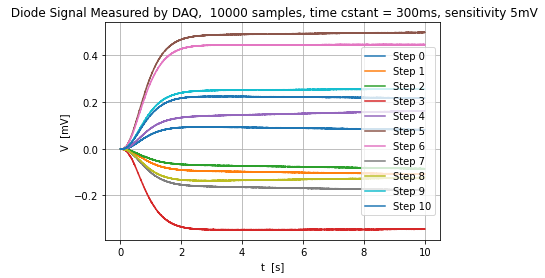

In [23]:
#for stepp in range(0,len(haber)):

fig,ax= plt.subplots()

#step = 4

ax.grid(True)
plt.plot(haber[0][1],haber[0][0],label= 'Step {st}'.format(st = 0 ))
plt.plot(haber[1][1],haber[1][0],label= 'Step {st}'.format(st = 1 ))
plt.plot(haber[2][1],haber[2][0],label= 'Step {st}'.format(st = 2 ))
plt.plot(haber[3][1],haber[3][0],label= 'Step {st}'.format(st = 3 ))
plt.plot(haber[4][1],haber[4][0],label= 'Step {st}'.format(st = 4 ))
plt.plot(haber[5][1],haber[5][0],label= 'Step {st}'.format(st =  5))
plt.plot(haber[6][1],haber[6][0],label= 'Step {st}'.format(st =  6))
plt.plot(haber[7][1],haber[7][0],label= 'Step {st}'.format(st =  7))
plt.plot(haber[8][1],haber[8][0],label= 'Step {st}'.format(st =  8))
plt.plot(haber[9][1],haber[9][0],label= 'Step {st}'.format(st = 9 ))
plt.plot(haber[10][1],haber[10][0],label= 'Step {st}'.format(st = 10 ))



ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [s]')
ax.set_title(' Diode Signal Measured by DAQ,  {b} samples, time cstant = 300ms, sensitivity 5mV'.format(b = len(haber[0][1]) ))
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse sweep t=32ms DAQ measured not so clean, 4 sweeping steps.png',bbox_inches='tight')

In [28]:
#for stepp in range(0,len(haber)):

fig,ax= plt.subplots()

#step = 4

ax.grid(True)
plt.plot(haber[0][1],haber[0][0],label= 'Step {st}'.format(st = 0 ))
plt.plot(haber[1][1],haber[1][0],label= 'Step {st}'.format(st = 1 ))
plt.plot(haber[2][1],haber[2][0],label= 'Step {st}'.format(st = 2 ))
plt.plot(haber[3][1],haber[3][0],label= 'Step {st}'.format(st = 3 ))
plt.plot(haber[4][1],haber[4][0],label= 'Step {st}'.format(st = 4 ))
plt.plot(haber[5][1],haber[5][0],label= 'Step {st}'.format(st = 5 ))
plt.plot(haber[6][1],haber[6][0],label= 'Step {st}'.format(st = 6 ))
plt.plot(haber[7][1],haber[7][0],label= 'Step {st}'.format(st = 7 ))
plt.plot(haber[8][1],haber[8][0],label= 'Step {st}'.format(st = 8 ))
plt.plot(haber[9][1],haber[9][0],label= 'Step {st}'.format(st = 9 ))
plt.plot(haber[10][1],haber[10][0],label= 'Step {st}'.format(st = 10 ))



ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [s]')
ax.set_title(' Diode Signal Measured by DAQ,  {b} samples, time cstant = 300ms, sensitivity 5mV'.format(b = len(haber[0][1]) ))
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse sweep t=32ms DAQ measured not so clean, 4 sweeping steps.png',bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [63]:
#for stepp in range(0,len(haber)):

fig,ax= plt.subplots()

#step = 4

ax.grid(True)
plt.plot(haber[0][1],haber[0][0],label= 'Step {st}'.format(st = 0 ))
plt.plot(haber[1][1],haber[1][0],label= 'Step {st}'.format(st = 1 ))
plt.plot(haber[2][1],haber[2][0],label= 'Step {st}'.format(st = 2 ))
plt.plot(haber[3][1],haber[3][0],label= 'Step {st}'.format(st = 3 ))
plt.plot(haber[4][1],haber[4][0],label= 'Step {st}'.format(st = 4 ))
plt.plot(haber[5][1],haber[5][0],label= 'Step {st}'.format(st = 5 ))
plt.plot(haber[6][1],haber[6][0],label= 'Step {st}'.format(st = 6 ))
plt.plot(haber[7][1],haber[7][0],label= 'Step {st}'.format(st = 7 ))
plt.plot(haber[8][1],haber[8][0],label= 'Step {st}'.format(st = 8 ))
plt.plot(haber[9][1],haber[9][0],label= 'Step {st}'.format(st = 9 ))
plt.plot(haber[10][1],haber[10][0],label= 'Step {st}'.format(st = 10 ))



ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [s]')
ax.set_title(' Diode Signal Measured by DAQ,  {b} samples, time cstant = 300ms, sensitivity 5mV'.format(b = len(haber[0][1]) ))
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse sweep t=32ms DAQ measured not so clean, 4 sweeping steps.png',bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [68]:
#for stepp in range(0,len(haber)):

fig,ax= plt.subplots()

#step = 4

ax.grid(True)
plt.plot(haber[0][1],haber[0][0],label= 'Step {st}'.format(st = 0 ))
plt.plot(haber[1][1],haber[1][0],label= 'Step {st}'.format(st = 1 ))
plt.plot(haber[2][1],haber[2][0],label= 'Step {st}'.format(st = 2 ))
plt.plot(haber[3][1],haber[3][0],label= 'Step {st}'.format(st = 3 ))
plt.plot(haber[4][1],haber[4][0],label= 'Step {st}'.format(st = 4 ))
plt.plot(haber[5][1],haber[5][0],label= 'Step {st}'.format(st = 5 ))
plt.plot(haber[6][1],haber[6][0],label= 'Step {st}'.format(st = 6 ))
plt.plot(haber[7][1],haber[7][0],label= 'Step {st}'.format(st = 7 ))
plt.plot(haber[8][1],haber[8][0],label= 'Step {st}'.format(st = 8 ))
plt.plot(haber[9][1],haber[9][0],label= 'Step {st}'.format(st = 9 ))
plt.plot(haber[10][1],haber[10][0],label= 'Step {st}'.format(st = 10 ))



ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [s]')
ax.set_title(' Diode Signal Measured by DAQ,  {b} samples'.format(b = len(haber[0][1]) ))
#ax.legend(loc=0)
plt.show()
fig.savefig('Pulse sweep t=32ms DAQ measured not so clean, 4 sweeping steps, time cstant = 100ms, sensitivity 5mV.png',bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [60]:
#for stepp in range(0,len(haber)):

fig,ax= plt.subplots()

#step = 4

ax.grid(True)
plt.plot(haber[0][1],abs(haber[0][0]),label= 'Step {st}'.format(st = 0 ))
plt.plot(haber[1][1],abs(haber[1][0]),label= 'Step {st}'.format(st = 1 ))
plt.plot(haber[2][1],abs(haber[2][0]),label= 'Step {st}'.format(st = 2 ))
plt.plot(haber[3][1],abs(haber[3][0]),label= 'Step {st}'.format(st = 3 ))
plt.plot(haber[4][1],abs(haber[4][0]),label= 'Step {st}'.format(st = 4 ))
plt.plot(haber[5][1],abs(haber[5][0]),label= 'Step {st}'.format(st = 5 ),color = 'black')
plt.plot(haber[6][1],abs(haber[6][0]),label= 'Step {st}'.format(st = 6 ))
plt.plot(haber[7][1],abs(haber[7][0]),label= 'Step {st}'.format(st = 7 ))
plt.plot(haber[8][1],abs(haber[8][0]),label= 'Step {st}'.format(st = 8 ))
plt.plot(haber[9][1],abs(haber[9][0]),label= 'Step {st}'.format(st = 9 ))
plt.plot(haber[10][1],abs(haber[10][0]),label= 'Step {st}'.format(st = 10 ))



ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [s]')
ax.set_title(' Diode Signal Measured by DAQ,  {b} samples, time cstant = 1s, sensitivity 5microV'.format(b = len(haber[0][1]) ))
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse sweep t=32ms DAQ measured not so clean, 4 sweeping steps.png',bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [46]:
%matplotlib inline

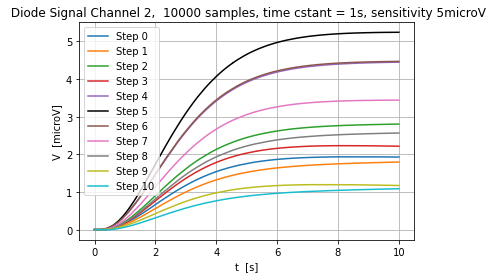

In [47]:
#for stepp in range(0,len(haber)):

fig,ax= plt.subplots()

#step = 4

ax.grid(True)
plt.plot(haber[0][1],abs(haber[0][0]),label= 'Step {st}'.format(st = 0 ))
plt.plot(haber[1][1],abs(haber[1][0]),label= 'Step {st}'.format(st = 1 ))
plt.plot(haber[2][1],abs(haber[2][0]),label= 'Step {st}'.format(st = 2 ))
plt.plot(haber[3][1],abs(haber[3][0]),label= 'Step {st}'.format(st = 3 ))
plt.plot(haber[4][1],abs(haber[4][0]),label= 'Step {st}'.format(st = 4 ))
plt.plot(haber[5][1],abs(haber[5][0]),label= 'Step {st}'.format(st = 5 ),color = 'black')
plt.plot(haber[6][1],abs(haber[6][0]),label= 'Step {st}'.format(st = 6 ))
plt.plot(haber[7][1],abs(haber[7][0]),label= 'Step {st}'.format(st = 7 ))
plt.plot(haber[8][1],abs(haber[8][0]),label= 'Step {st}'.format(st = 8 ))
plt.plot(haber[9][1],abs(haber[9][0]),label= 'Step {st}'.format(st = 9 ))
plt.plot(haber[10][1],abs(haber[10][0]),label= 'Step {st}'.format(st = 10 ))



ax.set_ylabel('V  [microV]')
ax.set_xlabel('t  [s]')
ax.set_title(' Diode Signal Channel 2,  {b} samples, time cstant = 1s, sensitivity 5microV'.format(b = len(haber[0][1]) ))
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse sweep t=32ms DAQ measured not so clean, 4 sweeping steps.png',bbox_inches='tight')

In [57]:
M8190A.write('SEQ:DEL:ALL')

12

In [5]:
pul,tm = Sweep(AutoCorScheme,10,step,20,7500000)

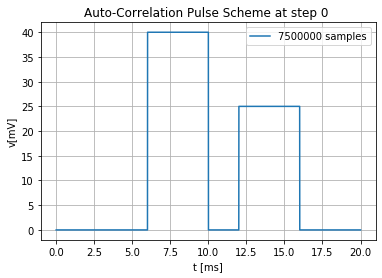

In [12]:
fig,axes = plt.subplots()

axes.grid(True)

axes.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel('t [ms]')
axes.set_ylabel('v[mV]')
axes.set_title('Auto-Correlation Pulse Scheme at step {a} '.format(a = step))

axes.legend(loc = 0)
plt.show()

In [ ]:
sweeping_run = Sequence_File_List(AutoCorSchemeA,AutoCorSchemeB,10,5,sam,0,10,AWG_Settings3)

In [11]:
aut_sweep = Sweep_Iteration(AutoCorSchemeA,10,5,sam,0,10)

In [6]:
aut_sweep[0][0]

array([0., 0., 0., ..., 0., 0., 0.])

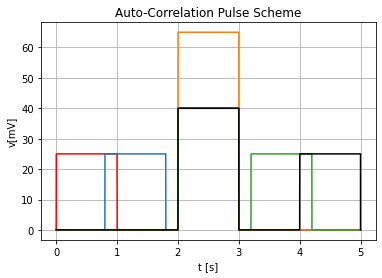

In [12]:
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(aut_sweep[1],aut_sweep[0][0],label = ' starting step ', color = 'red')
#plt.plot(aut_sweep[1],aut_sweep[0][1],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 1))
plt.plot(aut_sweep[1],aut_sweep[0][2],label = ' 2 step ')
#plt.plot(aut_sweep[1],aut_sweep[0][3],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 3))
#plt.plot(aut_sweep[1],aut_sweep[0][4],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 4))
plt.plot(aut_sweep[1],aut_sweep[0][5],label = ' midle step ')
#plt.plot(aut_sweep[1],aut_sweep[0][6],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 6))
#plt.plot(aut_sweep[1],aut_sweep[0][7],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 7))
plt.plot(aut_sweep[1],aut_sweep[0][8],label = ' 8 step ')
#plt.plot(aut_sweep[1],aut_sweep[0][9],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 9))
plt.plot(aut_sweep[1],aut_sweep[0][10],label = ' final step ', color = 'black')


axes.set_xlabel('t [ms]')
axes.set_ylabel('v[mV]')
axes.set_title('Auto-Correlation Pulse Scheme')

#axes.legend(loc = 0)
plt.show()

#fig.savefig('AutoCorrelation pulse scheme1.png',optimize=True,bbox_inches='tight')

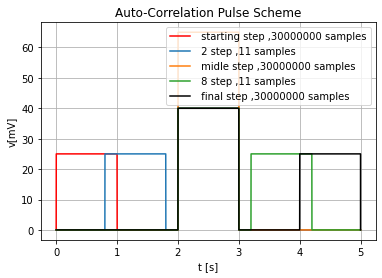

In [14]:
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(aut_sweep[1],aut_sweep[0][0],label = ' starting step ,{a} samples'.format(a = len(aut_sweep[0][0])), color = 'red')
#plt.plot(aut_sweep[1],aut_sweep[0][1],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 1))
plt.plot(aut_sweep[1],aut_sweep[0][2],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 2))
#plt.plot(aut_sweep[1],aut_sweep[0][3],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 3))
#plt.plot(aut_sweep[1],aut_sweep[0][4],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 4))
plt.plot(aut_sweep[1],aut_sweep[0][5],label = ' midle step ,{a} samples'.format(a = len(aut_sweep[0][0])))
#plt.plot(aut_sweep[1],aut_sweep[0][6],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 6))
#plt.plot(aut_sweep[1],aut_sweep[0][7],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 7))
plt.plot(aut_sweep[1],aut_sweep[0][8],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 8))
#plt.plot(aut_sweep[1],aut_sweep[0][9],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 9))
plt.plot(aut_sweep[1],aut_sweep[0][10],label = ' final step ,{a} samples'.format(a = len(aut_sweep[0][0])), color = 'black')


axes.set_xlabel('t [s]')
axes.set_ylabel('v[mV]')
axes.set_title('Auto-Correlation Pulse Scheme')

axes.legend(loc = 0)
plt.show()

#fig.savefig('AutoCorrelation pulse scheme1.png',optimize=True,bbox_inches='tight')

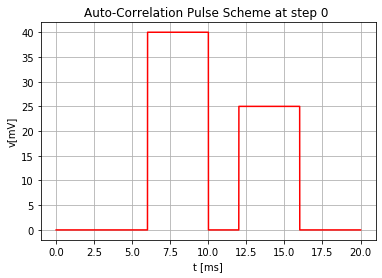

In [23]:
fig,axes = plt.subplots()

axes.grid(True)

axes.plot(aut_sweep[1],aut_sweep[0][0],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0][0]), b = 0), color = 'red')
#axes.plot(aut_sweep[1],aut_sweep[0][2],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 2))
#axes.plot(aut_sweep[1],aut_sweep[0][4],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 4))
#axes.plot(aut_sweep[1],aut_sweep[0][5],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0][0]), b = 5))
#axes.plot(aut_sweep[1],aut_sweep[0][9],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 9))
#axes.plot(aut_sweep[1],aut_sweep[0][10],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0][0]), b = 10), color = 'black')


axes.set_xlabel('t [ms]')
axes.set_ylabel('v[mV]')
axes.set_title('Auto-Correlation Pulse Scheme at step {a} '.format(a = step))

#axes.legend(loc = 0)
plt.show()

fig.savefig('AutoCorrelation pulse scheme step0.png',optimize=True,bbox_inches='tight')

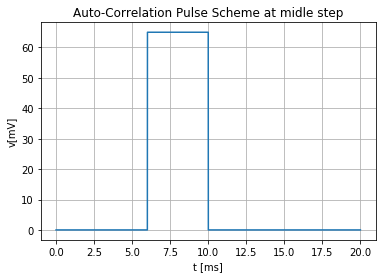

In [21]:
fig,axes = plt.subplots()

axes.grid(True)

#axes.plot(aut_sweep[1],aut_sweep[0][0],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0][0]), b = 0), color = 'red')
#axes.plot(aut_sweep[1],aut_sweep[0][2],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 2))
#axes.plot(aut_sweep[1],aut_sweep[0][4],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 4))
axes.plot(aut_sweep[1],aut_sweep[0][5],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0][0]), b = 5))
#axes.plot(aut_sweep[1],aut_sweep[0][9],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 9))
#axes.plot(aut_sweep[1],aut_sweep[0][10],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0][0]), b = 10), color = 'black')


axes.set_xlabel('t [ms]')
axes.set_ylabel('v[mV]')
axes.set_title('Auto-Correlation Pulse Scheme at midle step')

#axes.legend(loc = 0)
plt.show()

fig.savefig('AutoCorrelation pulse scheme step5.png',optimize=True,bbox_inches='tight')

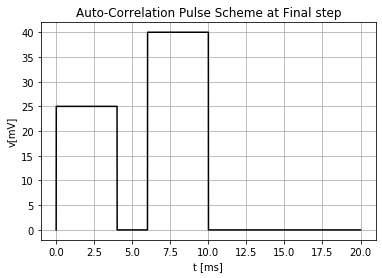

In [22]:
fig,axes = plt.subplots()

axes.grid(True)

#axes.plot(aut_sweep[1],aut_sweep[0][0],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0][0]), b = 0), color = 'red')
#axes.plot(aut_sweep[1],aut_sweep[0][2],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 2))
#axes.plot(aut_sweep[1],aut_sweep[0][4],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 4))
#axes.plot(aut_sweep[1],aut_sweep[0][5],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0][0]), b = 5))
#axes.plot(aut_sweep[1],aut_sweep[0][9],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0]), b = 9))
axes.plot(aut_sweep[1],aut_sweep[0][10],label = ' {b} step ,{a} samples'.format(a = len(aut_sweep[0][0]), b = 10), color = 'black')


axes.set_xlabel('t [ms]')
axes.set_ylabel('V[mV]')
axes.set_title('Auto-Correlation Pulse Scheme at Final step')

#axes.legend(loc = 0)
plt.show()

fig.savefig('AutoCorrelation pulse scheme step10.png',optimize=True,bbox_inches='tight')

In [13]:
def Sequence_File_List1(PulseList1,P,t,N,start,stop,AWG):

    """ Given one pulse scheme list, this functions iterates the pulse scheme from start to stop.

        This function firts creates the corresponding pulse sequence data given the PulseLists using the Sweep_iteration_csv function.

        It creates the csv files corresponding to this sweeping run and outputs it's Data Frames, aswell as a dictionary with its names (LOC1).
        It also outputs the time interval for the pulse scheme
        
        time is given in mili seconds
    """

    #SegmentA of the sequence
    Loc1,DF1,timm = Sweep_Iteration_CSV_List(PulseList1,P,t,N,start,stop,AWG,1)

    return Loc1, DF1, timm

In [14]:
sweeping_run = Sequence_File_List1(AutoCorScheme,3,20,7500000,0,3,AWG_Settings3)

In [73]:
sweeping_run[1]['SegmentA_7500000_0']['Y1']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
7499995    0.0
7499996    0.0
7499997    0.0
7499998    0.0
7499999    0.0
Name: Y1, Length: 7500000, dtype: float64

In [77]:
fig,ax= plt.subplots()


ax.grid(True)
fig.suptitle('Pulses Loaded into the AWG')


#ax[0].plot(sweeping_run[2],sweeping_run[0]['Y1']*AWG_Settings3['Voltage Amplitude'],label= 'Pulse A',color='blue')
ax.plot(sweeping_run[2],sweeping_run[1]['SegmentA_7500000_0']['Y1']*AWG_Settings3['Voltage Amplitude'],label= 'Pulse B',color='red')
ax.plot(sweeping_run[2],sweeping_run[1]['SegmentA_7500000_1']['Y1']*AWG_Settings3['Voltage Amplitude'],label= 'Pulse B',color='black')
ax.plot(sweeping_run[2],sweeping_run[1]['SegmentA_7500000_2']['Y1']*AWG_Settings3['Voltage Amplitude'],label= 'Pulse B',color='orange')
ax.plot(sweeping_run[2],sweeping_run[1]['SegmentA_7500000_3']['Y1']*AWG_Settings3['Voltage Amplitude'],label= 'Pulse B',color='blue')

#ax[0].set_ylabel('V  [mV]')
#ax[0].set_xlabel('t  [ms]')
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')

#ax.set_title('Pulses Loaded into the AWG')

fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig('Pulse_scheme_15ms_7500000',optimize=True,bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [21]:
sweeping_run[0]

{'Pulse File Location, at step 0': 'D:\\Alejandro\\Pulses\\Dict\\S3\\SegmentA_7500000_0.csv',
 'Pulse File Location, at step 1': 'D:\\Alejandro\\Pulses\\Dict\\S3\\SegmentA_7500000_1.csv',
 'Pulse File Location, at step 2': 'D:\\Alejandro\\Pulses\\Dict\\S3\\SegmentA_7500000_2.csv',
 'Pulse File Location, at step 3': 'D:\\Alejandro\\Pulses\\Dict\\S3\\SegmentA_7500000_3.csv'}

In [15]:
def Def_Sequence1(instrument,loop):

    """This function defines a new Sequence in the AWG and outputs the sequence id.

        The new sequence will have 1 steps, and will only load the two corresponding segments
        that must be prevoiusly defined and loaded in th AWG (either by hand, or with the Segment functions
        in this module).
        The Sequence will have a length of 2, it is specifically designed for creating sequences with segments.
        The table entries will set the advancement mode to Conditional.
    """


    #Defining new sequence, The SCPI query SEQ:DEF:NEW? returns the Sequence Id. as a string and this functions returns it as an int.
    seq_id = int(instrument.query('SEQ1:DEF:NEW? 1'))
    #instrument.write('SEQ:ADV {seqid},REP'.format(seqid = seq_id))


    #loading segments into sequences within the Instrment has the following syntaxis:
    #instrument.write('[:SOURce]:SEQuence[1|2]:DATA <sequence_id>, <step> , <segment_id>, <loop_count>,<advance_mode>,<marker_enable>, <start_addr>,<end_addr>

    #Loading Segment 1 to step 0 of Sequence 0
    instrument.write('SEQ1:DATA {seqid},0,1,{l},0,1,0,#hFFFFFFFF'.format(seqid = seq_id, l =loop))
    instrument.query('*OPC?')

    #Loading Segment 2 to step 1 of Sequence 0
    #instrument.write('SEQ1:DATA {seqid},1,2,{l},0,1,0,#hFFFFFFFF'.format(seqid = seq_id, l = loop))
    #instrument.query('*OPC?')
    
    instrument.write('SEQ:ADV 0, COND') #advancement condition
    instrument.query('*OPC?')
    #print('Sequence advancement method is {met}'.format(met = instrument.query('SEQ:ADV? 0')))
    
    instrument.write('STAB1:SEQ:SEL {t}'.format(t = seq_id))
    instrument.query('*OPC?')

    print('Sequence loaded with the following segment data "{b}"'.format(b = instrument.query('SEQ1:DATA? {c},0,2'.format(c=seq_id))),'and the advancement method is {met}'.format(met = instrument.query('SEQ:ADV? 0')))

    return seq_id

In [16]:
def Sequence_File1(instrument,file0,loop):

    """ Creates a sequence in the instrument by the data in file0 and file.

    This function first calls the Segment_File function to load the file0 and file1 csv data files as segments into the instrument.
    It then uses the AWG's SEQ subsystem to create a sequence from this two segments.This sequence is set to have "loop" loop count, auto advance mode
    and starting and ending address correspond to the first and last value of the data files.
    
    """
    Segment_File(instrument, file0, 1)

    #Define the corresponding Sequence:
    seq_id = Def_Sequence1(instrument,loop)
    return seq_id

In [17]:
def Sequence_Loader_File_DAQms_np1(instrument,DAQ_settings,sampling_rate,playingtime,fileA):
    
    """ This function loads the csv data files from the Location dictionaries into the instrument as a sequence and measures them withthe daq, for ms segime output is numpy array

    LocationA is a dictionary, whose elements are the file paths to the csv files that are going to be loaded as SegmentA into the sequence.
    LocationB is a dictionary, whose elemnts re the filepaths to the csv files that are going to be loaded as SegmentB into the sequence
    It uses the Sequence_File function to load the csv files to the instrument.
 
    """
    measurement_data = np.zeros((len(fileA),2),  dtype=object)
    #measurement_data = {}

    for i,k in zip(fileA,range(0,len(fileA))):
        Sequence_File1(instrument,fileA[i],1)
        measurement_data[k][0], measurement_data[k][1] = DAQ_Measuringms(DAQ_settings,sampling_rate,playingtime,instrument)
        print('Data acquired for Step {step}'.format(step = k ))
        #instrument.write('ABOR')

    return measurement_data

In [1]:
M8190A.write('SEQ:DEL:ALL')

NameError: name 'M8190A' is not defined

In [34]:
jojo = Sequence_Loader_File_DAQms_np1(M8190A,DAQ_Settings1,400000,15,sweeping_run[0])

Sequence loaded with the following segment data "1,1,0,1,0,7499999,1,1,0,1,0,7499999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 0
Sequence loaded with the following segment data "1,1,0,1,0,7499999,1,1,0,1,0,7499999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 1
Sequence loaded with the following segment data "1,1,0,1,0,7499999,1,1,0,1,0,7499999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 2
Sequence loaded with the following segment data "1,1,0,1,0,7499999,0,0,0,0,144,0" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 3


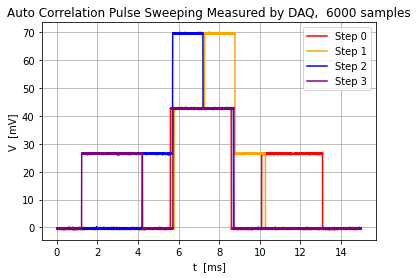

In [36]:
#for stepp in range(0,len(haber)):

fig,ax= plt.subplots()

#step = 4

ax.grid(True)
plt.plot(jojo[0][1],1000*jojo[0][0],label= 'Step {st}'.format(st = 0 ),color = 'red')
plt.plot(jojo[1][1],1000*jojo[1][0],label= 'Step {st}'.format(st = 1 ),color = 'orange')
plt.plot(jojo[2][1],1000*jojo[2][0],label= 'Step {st}'.format(st = 2 ),color = 'blue')
plt.plot(jojo[3][1],1000*jojo[3][0],label= 'Step {st}'.format(st = 3 ),color = 'purple')



ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title('Auto Correlation Pulse Sweeping Measured by DAQ,  {b} samples'.format(b = len(jojo[0][1]) ))
ax.legend(loc=0)
plt.show()
#fig.savefig('Auto Correlation Pulse Scheme, DAQ measured , 4 sweeping steps 15ms.png',bbox_inches='tight')

In [53]:
#for stepp in range(0,len(haber)):

fig,ax= plt.subplots()

#step = 4

ax.grid(True)
ax.plot(jojo[0][1],1000*jojo[0][0],label= 'Step {st}'.format(st = 0 ),color = 'red')
ax.plot(jojo[1][1],1000*jojo[1][0],label= 'Step {st}'.format(st = 1 ),color = 'orange')
ax.plot(jojo[2][1],1000*jojo[2][0],label= 'Step {st}'.format(st = 2 ),color = 'blue')
ax.plot(jojo[3][1],1000*jojo[3][0],label= 'Step {st}'.format(st = 3 ),color = 'purple')



ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title('Auto Correlation Pulse Sweeping Measured by DAQ,  {b} samples'.format(b = len(jojo[0][1]) ))
ax.legend(loc=0)
plt.show()
#fig.savefig('Auto Correlation Pulse Scheme, DAQ measured , 4 sweeping steps 15ms',bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
def DAQ_Measuring_Markers(DAQ_settings,sr,playingtime,instrument):
    """This function starts sets up the DAQ box in order to collect data for a time duration given by "playing time"
      It then uses the DAQ box to trigger the AWG into playing a waveform.

      playingtime should be in seconds.
      triggerinvoltage should be in volts.
    """
    #Calculating the number of samples given the samplig frecuency and playing time
    samples = int(sr * playingtime) 
    measuring_time = np.linspace(0,playingtime,samples)

    instrument.write('INIT:IMM')
    time.sleep(5)

    #setting the tasks
    measuring_task = nidaqmx.Task()
    trig_task =  nidaqmx.Task()
   current_tast = nidaqmx.Task()

   current_tast.ai_channels.add_ai_


    #Channels Configuration
    measuring_task.ai_channels.add_ai_voltage_chan("{a}/{b}".format(a = DAQ_settings['DAQ Name'], b = DAQ_settings['Analog Channel Input Waveform']),min_val=DAQ_settings['Minimum Voltage'],max_val= DAQ_settings['Maximum Voltage'])
    measuring_task.ai_channels.add_ai_voltage_chan("{a}/{b}".format(a = DAQ_settings['DAQ Name'], b = DAQ_settings['Analog Channel Input Marker']),min_val=DAQ_settings['Minimum Voltage Marker'],max_val= DAQ_settings['Maximum Voltage Marker'])
    trig_task.ao_channels.add_ao_voltage_chan('{a}/{b}'.format(a = DAQ_settings['DAQ Name'], b = DAQ_settings['Analog Channel Output']),'triggering',-4,4)

    #Sampling configuration measuring channel
    measuring_task.timing.cfg_samp_clk_timing(sr, samps_per_chan=samples)
    #trig_task.timing.cfg_samp_clk_timing(DAQ_settings['Sampling Frequency'], samps_per_chan=samples)
    #source = "measuring_task/SampleClock"

    trig_task.start()
    measuring_task.start()
    

    
    trig_task.write(1.5)
    #time.sleep(3)
    data = np.array(measuring_task.read(samples))


    
    #time.sleep(3)
    print('Triggering Pulse Stoped')
    trig_task.write(0)

    
    
    

    trig_task.stop()
    measuring_task.stop()

    measuring_task.close()
    trig_task.close()


    instrument.write('ABOR')

    return data, measuring_time

In [ ]:
def add_ai_current_chan(
            self, physical_channel, name_to_assign_to_channel="",
            terminal_config=TerminalConfiguration.DEFAULT, min_val=-0.01,
            max_val=0.01, units=CurrentUnits.AMPS,
            shunt_resistor_loc=CurrentShuntResistorLocation.LET_DRIVER_CHOOSE,
            ext_shunt_resistor_val=249.0, custom_scale_name=""):
        """
        Creates channel(s) to measure current.

        Args:
            physical_channel (str): Specifies the names of the physical
                channels to use to create virtual channels. The DAQmx
                physical channel constant lists all physical channels on
                devices and modules installed in the system.
            name_to_assign_to_channel (Optional[str]): Specifies a name
                to assign to the virtual channel this function creates.
                If you do not specify a value for this input, NI-DAQmx
                uses the physical channel name as the virtual channel
                name.
            terminal_config (Optional[nidaqmx.constants.TerminalConfiguration]): 
                Specifies the input terminal configuration for the
                channel.
            min_val (Optional[float]): Specifies in **units** the
                minimum value you expect to measure.
            max_val (Optional[float]): Specifies in **units** the
                maximum value you expect to measure.
            units (Optional[nidaqmx.constants.CurrentUnits]): Specifies
                the units to use to return current measurements.
            shunt_resistor_loc (Optional[nidaqmx.constants.CurrentShuntResistorLocation]): 
                Specifies the location of the shunt resistor. For
                devices with built-in shunt resistors, specify the
                location as **INTERNAL**. For devices that do not have
                built-in shunt resistors, you must attach an external
                one, set this input to **EXTERNAL** and use the
                **ext_shunt_resistor_val** input to specify the value of
                the resistor.
            ext_shunt_resistor_val (Optional[float]): Specifies in ohms
                the resistance of an external shunt resistor.
            custom_scale_name (Optional[str]): Specifies the name of a
                custom scale for the channel. If you want the channel to
                use a custom scale, specify the name of the custom scale
                to this input and set **units** to
                **FROM_CUSTOM_SCALE**.
        Returns:
            nidaqmx._task_modules.channels.ai_channel.AIChannel:
            
            Indicates the newly created channel object.
        """
        cfunc = lib_importer.windll.DAQmxCreateAICurrentChan
        if cfunc.argtypes is None:
            with cfunc.arglock:
                if cfunc.argtypes is None:
                    cfunc.argtypes = [
                        lib_importer.task_handle, ctypes_byte_str,
                        ctypes_byte_str, ctypes.c_int, ctypes.c_double,
                        ctypes.c_double, ctypes.c_int, ctypes.c_int,
                        ctypes.c_double, ctypes_byte_str]

        error_code = cfunc(
            self._handle, physical_channel, name_to_assign_to_channel,
            terminal_config.value, min_val, max_val, units.value,
            shunt_resistor_loc.value, ext_shunt_resistor_val,
            custom_scale_name)
        check_for_error(error_code)

        return self._create_chan(physical_channel, name_to_assign_to_channel)